In [2]:
import numpy as np
import pandas as pd

data={ 'X': [i for i in range(1,8)],
      'Y':[1.5,3.8,6.7,9.0,11.2,13.8,16]}


In [3]:
data = pd.DataFrame(data=data)
data

,X,Y
0,1,1.5
1,2,3.8
2,3,6.7
3,4,9.0
4,5,11.2
5,6,13.8
6,7,16.0


$$m=\frac{n\sum xy-\sum x\sum y}{n \sum x^2 -(\sum x)^2}$$

In [4]:
N = len(data)
X=data['X']
Y=data['Y']
Y_MEAN=sum(data['Y'])/N
data['XY'] =data['X']*data['Y']
sum_XY=data['XY'].sum()
sum_X=data['X'].sum()
sum_Y=data['Y'].sum()
sum_x_square= sum_X**2
squar_X=data['X'] ** 2
square_X=squar_X.sum()
 
data['squar_X']= squar_X

sum_X,sum_Y,sum_XY,sum_x_square,square_X,Y_MEAN






(28, 62.0, 316.0, 784, 140, 8.857142857142858)

In [5]:
numerator= (N*sum_XY-sum_X * sum_Y)
numerator

476.0

In [6]:
denominator = (N * square_X ) - sum_x_square
denominator

196

In [7]:
def Me(n,d):
    a= n/d
    return a

M=numerator/denominator
M,Me(numerator,denominator)

(2.4285714285714284, 2.4285714285714284)

$$B=\frac{\sum Y -M\sum X}{N}$$

In [8]:
#B=BAYSED

In [9]:
B= (sum_Y - M * sum_X)/N
B

-0.8571428571428571

$$ \hat{Y} = MX + C $$

In [10]:
#slope y = m x + c

In [11]:
data['Y_PRIDECT'] = [(M * X  + B) for X in range(1,8)]
data['Y_MEAN']=sum(data['Y'])/N
data['X_MEAN']=sum(data['X'])/N
data


,X,Y,XY,squar_X,Y_PRIDECT,Y_MEAN,X_MEAN
0,1,1.5,1.5,1,1.571429,8.857143,4.0
1,2,3.8,7.6,4,4.000000,8.857143,4.0
2,3,6.7,20.1,9,6.428571,8.857143,4.0
3,4,9.0,36.0,16,8.857143,8.857143,4.0
4,5,11.2,56.0,25,11.285714,8.857143,4.0
5,6,13.8,82.8,36,13.714286,8.857143,4.0
6,7,16.0,112.0,49,16.142857,8.857143,4.0


In [12]:
Y_PRIDECT = [(M * X  + B) for X in range(1,15)]
Y_PRIDECT 

[1.5714285714285712,
 3.9999999999999996,
 6.428571428571428,
 8.857142857142856,
 11.285714285714285,
 13.714285714285712,
 16.142857142857142,
 18.57142857142857,
 20.999999999999996,
 23.428571428571427,
 25.857142857142854,
 28.28571428571428,
 30.71428571428571,
 33.142857142857146]

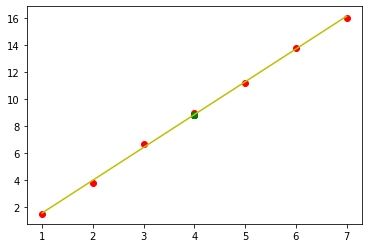

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data['X'],data['Y'],c='r')
plt.scatter(data['X_MEAN'],data['Y_MEAN'],c='g')
plt.plot(data['X'],data['Y_PRIDECT'],c='y')


$$ MSE=\frac{1}{N}\sum (Yi-\hat{Yi})^2$$

In [14]:
# mean square error

data['Yi_org - yi_prid']=(data['Y']-data['Y_PRIDECT'])**2
Z=data['Yi_org - yi_prid'].sum()
MSE = (1/N) * Z


def MSE(data):
    return sum([(y_org - y_pred)**2 for y_org,y_pred in zip(data['Y'],data['Y_PRIDECT'])])/N

MSE(data)

0.02489795918367362

$$ RMSE=\sqrt{\frac{1}{N}\sum (Yi-\hat{Yi})^2}$$

In [15]:
# root mean square error

import math

def RMSE(data):
    return math.sqrt(sum([(y_org - y_pred)**2 for y_org,y_pred in zip(data['Y'],data['Y_PRIDECT'])])/N)


RMSE(data)

0.1577908716741042

$$MAE=\frac{1}{N}\sum \left | Y_{pred}-Y_{mean} \right |$$

In [16]:
#mean absolute error 
#this is the measure of predicted values- original values, by total number of input values

In [17]:
def MAE(data):
    return abs(sum([(y_pred - y_mean ) for y_pred,y_mean in zip(data['Y_PRIDECT'],data['Y_MEAN'])]))/N
    
MAE(data)

1.2688263138573218e-15

 $$ R2SCORE=1-\frac{\sum (Y_{org}-\hat{y_{pred}})^{2}}{\sum(\hat{y_{pred}}-Y{mean})^{2}}$$

In [18]:
def R2(data):
    return  1-sum([(y_org - y_pred)**2 for y_org,y_pred in zip(data['Y'],data['Y_PRIDECT'])])/sum([(y_pred - y_mean)**2 for y_pred,y_mean in zip(data['Y_PRIDECT'],data['Y_MEAN'])])
R2(data)


0.9989446366782007

In [19]:
y_org=data['Y']
y_pred=data['Y_PRIDECT']
data['Y_MEAN']=(sum_Y)/2
data['Y_PRIDECT_MEAN']=(data['Y_PRIDECT'].sum())/2

def RSS(data):
    return sum([(y_org - y_pred) for y_org,y_pred in zip(data['Y'],data['Y_PRIDECT'])])

def TSS(data):
    return sum([(y_org - y_mean) for y_org,y_mean in zip(data['Y'],data['Y_MEAN'])])

def TSS2(data):
    return sum([(y_org - y_pridect_mean) for y_org,y_pridect_mean in zip(data['Y'],data['Y_PRIDECT_MEAN'])])


TSS(data)

-155.0

# CLASS

In [20]:
class linearregression:
    def __init__(self,data):
            self.data=data
            
    def M_SLOPE(self,data):
        X=(len(data)*sum(data['XY'])-sum(data['X'])*sum(data['Y']))
        Y=(len(data)* sum(data['squar_X'])-(sum(data['X'])**2))
        M=X/Y
        return M
    
    def B(self,data):
        B=(sum(data['Y']) - M * sum(data['X']))/N
        return B
    
    def SLOPE(self,data):
        X=data['X']
        Y=[(M * X + B) for X in range(1,len(X)+1)]
        return Y
    
    def MSE(self,data):
        MSE=sum([(y_org - y_pred)**2 for y_org,y_pred in zip(data['Y'],data['Y_PRIDECT'])])/N
        return MSE
    
    def RMSE(self,data):
        RMSE=math.sqrt(sum([(y_org - y_pred)**2 for y_org,y_pred in zip(data['Y'],data['Y_PRIDECT'])])/N)
        return RMSE
    
    def MAE(self,data):
        MAE=abs(sum([(y_pred - y_mean ) for y_pred,y_mean in zip(data['Y_PRIDECT'],data['Y_MEAN'])]))/N
        return MAE
    
    def R2(self,data):
        R2=1-sum([(y_org - y_pred)**2 for y_org,y_pred in zip(data['Y'],data['Y_PRIDECT'])])/sum([(y_org - y_mean)**2 for y_org,y_mean in zip(data['Y'],data['Y_MEAN'])])
        return R2
    
    


    

        
    
p=linearregression(data)
p.R2(data)
   
            

0.9999515531196217